In [1]:
import sys
import os
# Getting src path to import modules
src_path = os.path.abspath(os.path.join(os.getcwd(), '..', 'src'))

# Adding src path to the system path, if not already added
if src_path not in sys.path:
    sys.path.append(src_path)

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from dl_models import ANN as ann
from dl_models import RNN as rnn
from ml_models import RandomForest as rf
from ml_models import PolynomialFeatures as pf
# from causal_models import CausalDiscovery as cd

In [3]:
# Time series data for a specific building (Building_1.csv/Building_2.csv/Building_3.csv).
electricity_data = pd.read_csv("../data/citylearn_challenge_2023_phase_1/Building_1.csv")

# Carbon intensity data.
carbon_data = pd.read_csv("../data/citylearn_challenge_2023_phase_1/carbon_intensity.csv")

# Pricing data.
pricing_data = pd.read_csv("../data/citylearn_challenge_2023_phase_1/pricing.csv")

# Weather data.
weather_data = pd.read_csv("../data/citylearn_challenge_2023_phase_1/weather.csv")

# Concatenate multiple datasets along the columns to create a single dataset.
df = pd.concat([electricity_data, carbon_data, pricing_data, weather_data], axis=1)

# Displaying the last 5 samples of the dataframe to show its structure.
df.tail()

,month,hour,day_type,daylight_savings_status,indoor_dry_bulb_temperature,average_unmet_cooling_setpoint_difference,indoor_relative_humidity,non_shiftable_load,dhw_demand,cooling_demand,...,outdoor_dry_bulb_temperature_predicted_24h,outdoor_relative_humidity_predicted_6h,outdoor_relative_humidity_predicted_12h,outdoor_relative_humidity_predicted_24h,diffuse_solar_irradiance_predicted_6h,diffuse_solar_irradiance_predicted_12h,diffuse_solar_irradiance_predicted_24h,direct_solar_irradiance_predicted_6h,direct_solar_irradiance_predicted_12h,direct_solar_irradiance_predicted_24h
715,6,20,6,0,24.468618,0.024173,54.277103,0.442291,0.398354,5.189857,...,32.905895,89.465866,73.861000,40.875510,0.0,110.15520,0.0,0.0,271.32200,0.0
716,6,21,6,0,24.444859,0.000415,54.351337,0.990416,0.199180,4.550693,...,32.669003,87.158066,66.389130,64.036320,0.0,216.20418,0.0,0.0,151.80556,0.0
717,6,22,6,0,24.444464,0.000019,54.532566,1.563732,0.000000,4.043389,...,29.979940,100.000000,58.228535,51.990180,0.0,259.28485,0.0,0.0,374.21823,0.0
718,6,23,6,0,24.444452,0.000009,54.647182,0.421510,0.000000,3.268111,...,28.337627,90.768420,35.361465,60.445404,0.0,272.40073,0.0,0.0,582.50290,0.0
719,6,24,6,0,21.812447,0.145780,63.234272,0.374985,0.000000,6.492827,...,25.415920,82.899440,47.129494,56.078560,0.0,129.96535,0.0,0.0,842.14680,0.0


In [4]:
target = 'cooling_demand'

features = ['month', 'hour', 'day_type', 'daylight_savings_status', 'indoor_dry_bulb_temperature', 'average_unmet_cooling_setpoint_difference', 
            'indoor_relative_humidity', 'non_shiftable_load', 'dhw_demand', 'heating_demand', 'solar_generation', 'occupant_count', 
            'indoor_dry_bulb_temperature_set_point', 'hvac_mode', 'carbon_intensity', 'electricity_pricing', 
            'electricity_pricing_predicted_6h', 'electricity_pricing_predicted_12h', 'electricity_pricing_predicted_24h', 
            'outdoor_dry_bulb_temperature', 'outdoor_relative_humidity', 'diffuse_solar_irradiance', 'direct_solar_irradiance', 
            'outdoor_dry_bulb_temperature_predicted_6h', 'outdoor_dry_bulb_temperature_predicted_12h', 'outdoor_dry_bulb_temperature_predicted_24h', 
            'outdoor_relative_humidity_predicted_6h', 'outdoor_relative_humidity_predicted_12h', 'outdoor_relative_humidity_predicted_24h', 
            'diffuse_solar_irradiance_predicted_6h', 'diffuse_solar_irradiance_predicted_12h', 'diffuse_solar_irradiance_predicted_24h', 
            'direct_solar_irradiance_predicted_6h', 'direct_solar_irradiance_predicted_12h', 'direct_solar_irradiance_predicted_24h']

In [5]:
real_ann, pred_ann = ann.ANN(df, features, target)

Epoch 1/150
13/13 [==============================] - 66s 47ms/step - loss: 12.1084 - mean_absolute_error: 2.9471 - val_loss: 8.1273 - val_mean_absolute_error: 2.3339
Epoch 2/150
13/13 [==============================] - 0s 5ms/step - loss: 6.0973 - mean_absolute_error: 1.9012 - val_loss: 2.8166 - val_mean_absolute_error: 1.3196
Epoch 3/150
13/13 [==============================] - 0s 5ms/step - loss: 2.9749 - mean_absolute_error: 1.3872 - val_loss: 2.5743 - val_mean_absolute_error: 1.2964
Epoch 4/150
13/13 [==============================] - 0s 5ms/step - loss: 2.3904 - mean_absolute_error: 1.2476 - val_loss: 1.9639 - val_mean_absolute_error: 1.1231
Epoch 5/150
13/13 [==============================] - 0s 5ms/step - loss: 2.0784 - mean_absolute_error: 1.1362 - val_loss: 1.7885 - val_mean_absolute_error: 1.0728
Epoch 6/150
13/13 [==============================] - 0s 5ms/step - loss: 1.8117 - mean_absolute_error: 1.0723 - val_loss: 1.6526 - val_mean_absolute_error: 1.0321
Epoch 7/150
13/13 [

In [6]:
real_poly, pred_poly = pf.Polynomial(df, features, target, 5)

In [7]:
real_rf, pred_rf = rf.RandomForest(df, features, target)

In [8]:
real_rnn, pred_rnn = rnn.RNN(df, target, 24)

Epoch 1/150
13/13 [==============================] - 3s 118ms/step - loss: 22.8121 - mean_absolute_error: 1.6154 - val_loss: 0.0166 - val_mean_absolute_error: 0.1054
Epoch 2/150
13/13 [==============================] - 1s 99ms/step - loss: 0.0245 - mean_absolute_error: 0.1239 - val_loss: 0.0124 - val_mean_absolute_error: 0.0893
Epoch 3/150
13/13 [==============================] - 1s 108ms/step - loss: 0.0188 - mean_absolute_error: 0.1066 - val_loss: 0.0127 - val_mean_absolute_error: 0.0918
Epoch 4/150
13/13 [==============================] - 1s 106ms/step - loss: 0.0140 - mean_absolute_error: 0.0887 - val_loss: 0.0107 - val_mean_absolute_error: 0.0796
Epoch 5/150
13/13 [==============================] - 1s 100ms/step - loss: 0.0125 - mean_absolute_error: 0.0867 - val_loss: 0.0108 - val_mean_absolute_error: 0.0781
Epoch 6/150
13/13 [==============================] - 1s 88ms/step - loss: 0.0119 - mean_absolute_error: 0.0835 - val_loss: 0.0086 - val_mean_absolute_error: 0.0668
Epoch 7/150

In [9]:
#real_cd, pred_cd = cd.CausalDiscovery(df, target)

In [10]:
models = {
    'ANN': (real_ann, pred_ann),
    'Polynomial': (real_poly, pred_poly),
    'RandomForest': (real_rf, pred_rf),
    'RNN': (real_rnn, pred_rnn)
}

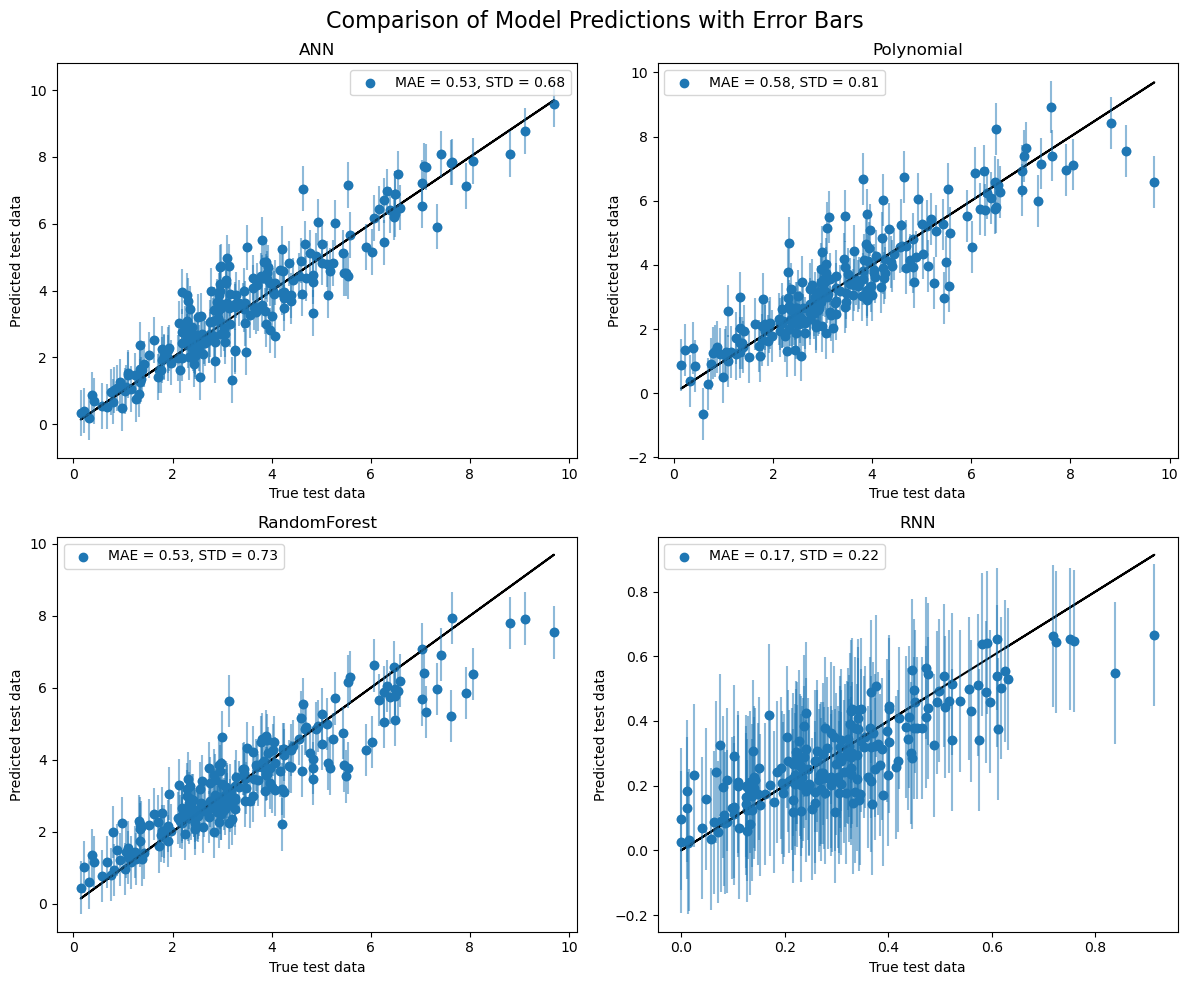

In [11]:
def plot_with_error_bars(ax, real, pred, model_name):
    mae = np.abs(real - pred).mean()
    std = np.std(real - pred)
    
    ax.scatter(real, pred, label=f"MAE = {mae:.2f}, STD = {std:.2f}")
    
    ax.plot(real, real, 'k-')
    
    ax.errorbar(real, pred, yerr=std, fmt='o', alpha=0.5)
    
    ax.set_xlabel('True test data')
    ax.set_ylabel('Predicted test data')
    ax.set_title(f"{model_name}")
    ax.legend()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

for ax, (model_name, (real, pred)) in zip(axes.flatten(), models.items()):
    plot_with_error_bars(ax, real, pred, model_name)

fig.suptitle('Comparison of Model Predictions with Error Bars', fontsize=16)

plt.tight_layout()
plt.show()